In [ ]:
!pip install -q contractions
!pip install -q demoji
!pip install -q pyspellchecker
!pip install -q vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 752.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import re
import string
import contractions
import demoji
import unicodedata
import matplotlib.pyplot as plt

import spacy
nlp = spacy.load('en_core_web_sm')

import warnings
warnings.filterwarnings("ignore")

import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from spellchecker import SpellChecker
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, ImageColorGenerator

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# **Crawl Data Twitter > 2000 Tweets**
The crawling process was done using Tweet-Harvest. Written by Helmi Satria on  March 30th 2024.



In [ ]:
#@title Twitter Auth Token

# twitter_auth_token = 'c9f7894e02b1b3880839248b1b5f353ef2c73dd3'

In [ ]:
# # Import required Python package
# !pip install pandas

# # Install Node.js (because tweet-harvest built using Node.js)
# !sudo apt-get update
# !sudo apt-get install -y ca-certificates curl gnupg
# !sudo mkdir -p /etc/apt/keyrings
# !curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

# !NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

# !sudo apt-get update
# !sudo apt-get install nodejs -y

# !node -v

In [ ]:
# # Crawl Data

# filename = 'crypto_sentiment.csv'
# search_keyword = '#Crypto'
# limit = 1000

# !npx -y tweet-harvest@latest -o "{filename}" -s "{search_keyword}" --tab "LATEST" -l {limit} --token {twitter_auth_token}

In [ ]:
# import pandas as pd

# # Specify the path to your CSV file
# file_path = f"/content/tweets-data/{filename}"

# # Read the CSV file into a pandas DataFrame
# df = pd.read_csv(file_path, delimiter=",")

# # Display the DataFrame
# display(df)

In [ ]:
# # Cek jumlah data yang didapatkan

# num_tweets = len(df)
# print(f"Jumlah tweet dalam dataframe adalah {num_tweets}.")

# **Import Data**

In [ ]:
# from gdrive
df = pd.read_csv('/content/drive/MyDrive/crypto_sentiment.csv')
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1.790000e+18,Wed May 15 23:54:12 +0000 2024,0,Canada's 'Crypto King' and associate arrested...,1.790000e+18,NaN,NaN,en,Santorini,0,0,0,https://x.com/Trend_Direction/status/179089347...,1.760000e+18,Trend_Direction
1,1.770000e+18,Tue Mar 19 01:59:09 +0000 2024,0,9/ As I said earlier #Crypto and #Bitcoin have...,1.770000e+18,NaN,pippimps,en,NaN,0,1,0,https://x.com/pippimps/status/1769906424329498761,1.610000e+18,pippimps
2,1.790000e+18,Mon May 20 10:10:00 +0000 2024,1,🆕NEW UPDATE: The former employee of #memecoin ...,1.790000e+18,https://pbs.twimg.com/media/GOA4ZYjbsAADj6W.jpg,NaN,en,Spain,0,0,0,https://x.com/OrvilleWright_I/status/179249799...,1.710000e+18,OrvilleWright_I
3,1.720000e+18,Sun Nov 05 11:43:41 +0000 2023,1,#XRP is up 3 cents since this post nice. Nothi...,1.720000e+18,NaN,_VatOS_,en,locus non campi flegrei,0,2,0,https://x.com/_VatOS_/status/1721131163480412219,1.450000e+18,_VatOS_
4,1.790000e+18,Wed May 22 14:04:23 +0000 2024,8,CRYPTO TRADERS BE LIKE #Bitcoin #btc #finance ...,1.790000e+18,https://pbs.twimg.com/ext_tw_video_thumb/17932...,NaN,en,NaN,1,2,2,https://x.com/all_crypto_gems/status/179328176...,1.370000e+18,all_crypto_gems


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      1560 non-null   float64
 1   created_at               1560 non-null   object 
 2   favorite_count           1560 non-null   int64  
 3   full_text                1560 non-null   object 
 4   id_str                   1560 non-null   float64
 5   image_url                666 non-null    object 
 6   in_reply_to_screen_name  170 non-null    object 
 7   lang                     1560 non-null   object 
 8   location                 982 non-null    object 
 9   quote_count              1560 non-null   int64  
 10  reply_count              1560 non-null   int64  
 11  retweet_count            1560 non-null   int64  
 12  tweet_url                1560 non-null   object 
 13  user_id_str              1560 non-null   float64
 14  username                

# **Cleansing Data**

In [ ]:
df_clean = df[['created_at', 'full_text', 'lang', 'username']]

In [ ]:
# Filter Text Language (Only English)

df_clean = df_clean.drop(df_clean.loc[df_clean.lang != 'en'].index).reset_index(drop = True)
df_clean.lang.value_counts()

lang
en    1506
Name: count, dtype: int64

In [ ]:
# URL

df_clean.full_text = df_clean.full_text.str.replace(r'http(s)?://\S+|www\.\S+', '', regex=True)

In [ ]:
# Email

df_clean.full_text = df_clean.full_text.apply(lambda x: re.sub(r'\S+@\S+', '', x))

In [ ]:
# Date

df_clean.full_text = df_clean.full_text.apply(lambda x: re.sub(r'\d{1,2}(st|nd|rd|th)?[-./]\d{1,2}[-./]\d{2,4}', '', x))
df_clean.full_text = df_clean.full_text.apply(lambda x: re.compile(r'(\d{1,2})?(st|nd|rd|th)?[-./,]?\s?(of)?\s?([J|j]an(uary)?|[F|f]eb(ruary)?|[Mm]ar(ch)?|[Aa]pr(il)?|[Mm]ay|[Jj]un(e)?|[Jj]ul(y)?|[Aa]ug(ust)?|[Ss]ep(tember)?|[Oo]ct(ober)?|[Nn]ov(ember)?|[Dd]ec(ember)?)\s?(\d{1,2})?(st|nd|rd|th)?\s?[-./,]?\s?(\d{2,4})?')
                                            .sub(r'', x))

In [ ]:
# HTML Tags

df_clean.full_text = df_clean.full_text.apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

In [ ]:
# Emoji to Words

df_clean.full_text = df_clean.full_text.apply(lambda x: demoji.replace_with_desc(x, sep="_"))

In [ ]:
# Chat Words Conversion

chat_words = """
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
QPSA?=Que Pasa?
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
OMG=Oh my god
"""

chat_words_dict = dict()
chat_words_set = set()

def cw_conversion(full_text):
  new_full_text = []
  for word in full_text.split():
      if word.upper() in chat_words_set:
          new_full_text.append(chat_words_dict[word.upper()])
      else:
          new_full_text.append(word)
  return " ".join(new_full_text)

for line in chat_words.split('\n'):
  if line != '':
      cw, cw_expanded = line.split('=')[0], line.split('=')[1]

      chat_words_set.add(cw)
      chat_words_dict[cw] = cw_expanded

df_clean.full_text = df_clean.full_text.apply(lambda x: cw_conversion(x))

In [ ]:
# Emoticons

EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

df_clean.full_text = df_clean.full_text.apply(lambda x: re.compile(u'(' + u'|'.join(emo for emo in EMOTICONS) + u')').sub(r'', x))

In [ ]:
# Mentions

df_clean.full_text = df_clean.full_text.apply(lambda x: re.compile(r'(@\S+)').sub('', x))

In [ ]:
# Extract Hastag

def extract_hashtags(text):

  hashtags = re.findall(r'#\w+', text)
  text_without_hashtags = re.sub(r'#\w+', '', text)

  for tag in hashtags:
    tag_without_hash = tag[1:]
    split_tag = re.findall(r'[A-Z][^A-Z]*', tag_without_hash)

    for word in split_tag:
      text_without_hashtags += ' ' + word.lower()

  return text_without_hashtags.strip()

df_clean.full_text = df_clean.full_text.apply(extract_hashtags)

In [ ]:
# Expanding Contractions

def expand_contractions(full_text):
  expanded_full_text = []
  for line in full_text.split():
      expanded_full_text.append(contractions.fix(line))
  return expanded_full_text

df_clean.full_text = df_clean.full_text.apply(lambda x: ' '.join(expand_contractions(x)))

In [ ]:
# Punctuations

PUNCTUATIONS = string.punctuation + '“”…'

df_clean.full_text = df_clean.full_text.apply(lambda x: re.sub(r'[{}]+'.format(PUNCTUATIONS), ' ', x))

In [ ]:
# Numbers

df_clean.full_text = df_clean.full_text.str.replace(r'\d+', '', regex=True)

In [ ]:
# Lower Casing

df_clean.full_text = df_clean.full_text.str.lower()

In [ ]:
# Extra Whitespaces

df_clean.full_text = df_clean.full_text.apply(lambda x: ' '.join(x.split()))

In [ ]:
# POS Tagger and Spell Checker

spell = SpellChecker()

def pos_tag(text):

  def remove_accents(data):
    return ''.join(x for x in unicodedata.normalize('NFKD', data) if x in string.ascii_letters or x == " ")

  txt = ' '.join([remove_accents(word) if word.lower() != 'crypto' else '' for word in text.split()])
  words = []

  for token in nlp(txt):

      if not token.tag_ in ['NNP', 'CC', 'DT', 'IN', 'SYM']:

        if spell.correction(token.text):

          t = spell.correction(token.text).lower()
          if len(t) > 1:
            words.append(t)

  return ' '.join(words)

df_clean.full_text = df_clean.full_text.apply(pos_tag)

In [ ]:
# Remove Text Duplicates
df_clean = df_clean.drop_duplicates(subset = ['full_text'])
df_clean.full_text.duplicated().value_counts()

full_text
False    1407
Name: count, dtype: int64

In [ ]:
pd.concat([df_clean.full_text, df.full_text.rename('real_text')], axis = 1).head()

,full_text,real_text
0,king associate arrested scheme stay cautious w...,Canada's 'Crypto King' and associate arrested...
1,said earlier have been scam their very incepti...,9/ As I said earlier #Crypto and #Bitcoin have...
2,new button new update former employee creation...,🆕NEW UPDATE: The former employee of #memecoin ...
3,is up cents post nice nothing sitting around w...,#XRP is up 3 cents since this post nice. Nothi...
4,traders be sol you you,CRYPTO TRADERS BE LIKE #Bitcoin #btc #finance ...


# **Stemming**

In [ ]:
stemmer = SnowballStemmer(language = 'english')

df_clean['text_stemmed'] = df_clean.full_text.apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
df_clean[['full_text', 'text_stemmed']].head()

,full_text,text_stemmed
0,king associate arrested scheme stay cautious w...,king associ arrest scheme stay cautious when i...
1,said earlier have been scam their very incepti...,said earlier have been scam their veri incept ...
2,new button new update former employee creation...,new button new updat former employe creation t...
3,is up cents post nice nothing sitting around w...,is up cent post nice noth sit around watch you...
4,traders be sol you you,trader be sol you you


# **Lemmatization**

In [ ]:
df_clean['text_lemmatized'] = df_clean.full_text.apply(lambda x: ' '.join([word.lemma_ for word in nlp(x)]))
df_clean[['full_text', 'text_lemmatized']].head()

,full_text,text_lemmatized
0,king associate arrested scheme stay cautious w...,king associate arrest scheme stay cautious whe...
1,said earlier have been scam their very incepti...,say early have be scam their very inception it...
2,new button new update former employee creation...,new button new update former employee creation...
3,is up cents post nice nothing sitting around w...,be up cent post nice nothing sit around watch ...
4,traders be sol you you,trader be sol you you


# **Labeling**

In [ ]:
txt = ['text_stemmed', 'text_lemmatized']

# 0: Stemming | 1: Lemmatization
text_used = txt[1]

In [ ]:
def sentiment_polarity(text):

  sentiment = SentimentIntensityAnalyzer()

  if sentiment.polarity_scores(text)['compound'] >= 0.05:
    return 'positive'
  elif sentiment.polarity_scores(text)['compound'] <= -0.05:
    return 'negative'
  else:
    return 'neutral'

df_clean = df_clean.drop(df_clean.loc[df_clean[text_used]==''].index).reset_index(drop=True)

df_clean['sentiment'] = df_clean.full_text.apply(sentiment_polarity)
df_clean[['sentiment', text_used]].head()

,sentiment,text_lemmatized
0,negative,king associate arrest scheme stay cautious whe...
1,negative,say early have be scam their very inception it...
2,negative,new button new update former employee creation...
3,positive,be up cent post nice nothing sit around watch ...
4,neutral,trader be sol you you


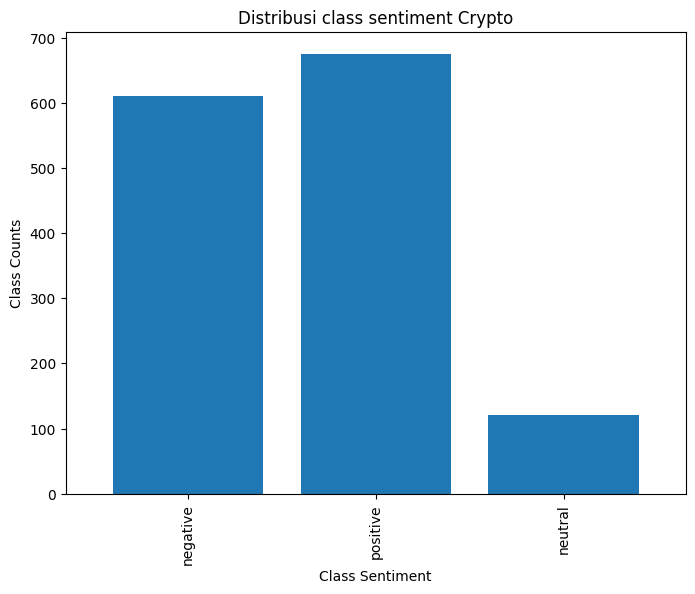

sentiment
positive    675
negative    610
neutral     121
Name: count, dtype: int64

In [ ]:
df_clean.sentiment.value_counts()[df_clean.sentiment.unique()].plot(
    kind = 'bar',
    title = 'Distribusi class sentiment Crypto',
    xlabel = 'Class Sentiment',
    ylabel = 'Class Counts',
    width = 0.8,
    figsize = (8, 6)
)
plt.show()

df_clean.sentiment.value_counts()

# **Stop Words**

In [ ]:
# Remove Stopwords

stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):

  tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
  words = []

  for token in tokens:

    if not token in stopwords:
      words.append(token)

  return ' '.join(words)

df_clean['result'] = df_clean[text_used].apply(lambda x: remove_stopwords(x))
df_clean[['sentiment', text_used, 'result']].head(10)

,sentiment,text_lemmatized,result
0,negative,king associate arrest scheme stay cautious whe...,king associate arrest scheme stay cautious inv...
1,negative,say early have be scam their very inception it...,say early scam inception first time crooked ex...
2,negative,new button new update former employee creation...,new button new update former employee creation...
3,positive,be up cent post nice nothing sit around watch ...,cent post nice nothing sit around watch invest...
4,neutral,trader be sol you you,trader sol
5,positive,today island they say it fool day have be worl...,today island say fool day world two year feel ...
6,negative,well close quarter red bad part be it be bad y...,well close quarter red bad part bad year time ...
7,negative,back protocol finance lose due we vulnerabilit...,back protocol finance lose due vulnerability n...
8,positive,only begin to trust link you can confirm they ...,begin trust link confirm legitimate scam check...
9,negative,gala game exploit million cause gala token to ...,gala game exploit million cause gala token dro...


# **Remove Neutral**

In [ ]:
df_noneutral = df_clean.drop(df_clean.loc[df_clean.sentiment == 'neutral'].index).reset_index(drop = True)

df_noneutral[['sentiment', 'result']].head()

,sentiment,result
0,negative,king associate arrest scheme stay cautious inv...
1,negative,say early scam inception first time crooked ex...
2,negative,new button new update former employee creation...
3,positive,cent post nice nothing sit around watch invest...
4,positive,today island say fool day world two year feel ...


# **WordCloud**

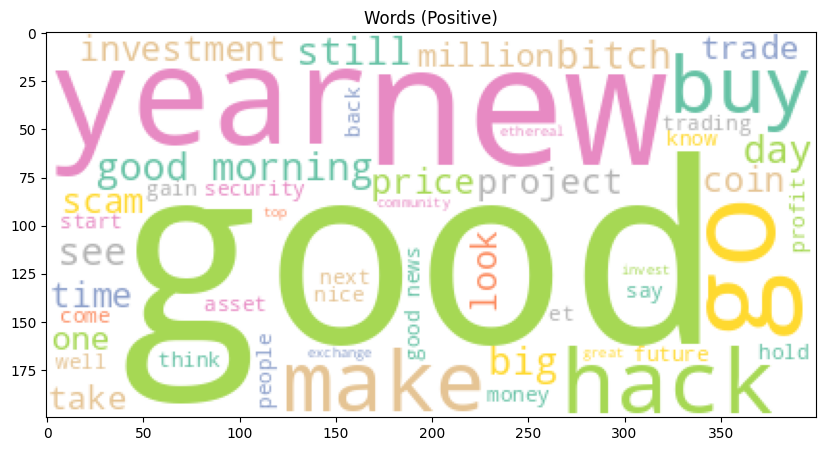

In [ ]:
# Positive Words
text = " ".join(str(word) for word in df_noneutral.result.loc[df_noneutral.sentiment == 'positive'].unique())
wordcloud = WordCloud(max_words = 50,colormap = 'Set2', background_color = "white").generate(text)
plt.figure(figsize = (10,5))
plt.title('Words (Positive)')
plt.imshow(wordcloud)
plt.show()

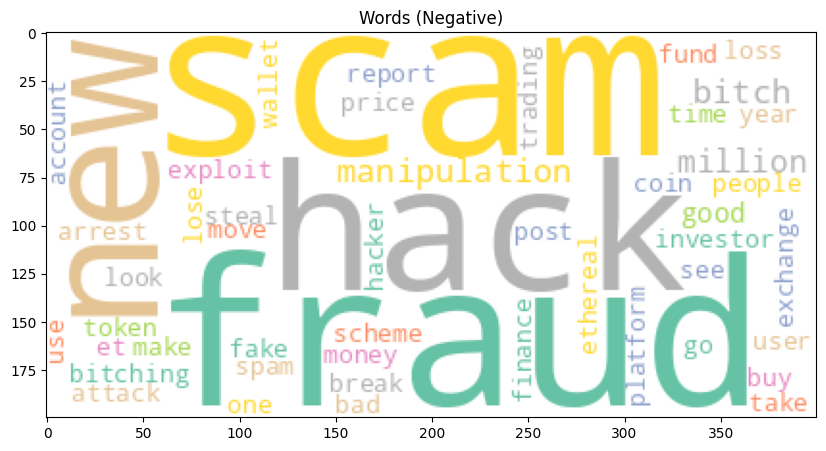

In [ ]:
# Negative Words
text = " ".join(str(word) for word in df_noneutral.result.loc[df_noneutral.sentiment == 'negative'].unique())
wordcloud = WordCloud(max_words = 50,colormap = 'Set2', background_color = "white").generate(text)
plt.figure(figsize = (10,5))
plt.title('Words (Negative)')
plt.imshow(wordcloud)
plt.show()

# **Skema TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [ ]:
train = df_noneutral.result.to_list()

# instantiate the vectorizer object
countvectorizer = CountVectorizer(analyzer = 'word', stop_words = 'english')
tfidfvectorizer = TfidfVectorizer(analyzer = 'word', stop_words = 'english')

# convert the documents into a matrix
count_wm = countvectorizer.fit_transform(train)
tfidf_wm = tfidfvectorizer.fit_transform(train)

#count_tokens = tfidfvectorizer.get_feature_names() # no difference
count_tokens = countvectorizer.get_feature_names_out()
tfidf_tokens = tfidfvectorizer.get_feature_names_out()

df_countvect = pd.DataFrame(
    data = count_wm.toarray(),
    index = [f'Data ke {i + 1}' for i in range(len(df_noneutral.result))],
    columns = count_tokens
)

df_tfidfvect = pd.DataFrame(
    data = tfidf_wm.toarray(),
    index = [f'Data ke {i + 1}' for i in range(len(df_noneutral.result))],
    columns = tfidf_tokens
)

print("Count Vectorizer\n")
print(df_countvect)
print("\nTD-IDF Vectorizer\n")
print(df_tfidfvect)

Count Vectorizer

              abet  able  abortion  abrupt  absolutely  absorb  absurd  \
Data ke 1        0     0         0       0           0       0       0   
Data ke 2        0     0         0       0           0       0       0   
Data ke 3        0     0         0       0           0       0       0   
Data ke 4        0     0         0       0           0       0       0   
Data ke 5        0     0         0       0           0       0       0   
...            ...   ...       ...     ...         ...     ...     ...   
Data ke 1281     0     0         0       0           0       0       0   
Data ke 1282     0     0         0       0           0       0       0   
Data ke 1283     0     0         0       0           0       0       0   
Data ke 1284     0     0         0       0           0       0       0   
Data ke 1285     0     0         0       0           0       0       0   

              academy  accelerate  accept  ...  yesterday  yid  yield  yin  \
Data ke 1      

# **Analisis Sentimen Random Forest, XGBoost , Support Vector Machine**

In [ ]:
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [ ]:
X = df_tfidfvect.values
y = np.array([(1 if i == 'positive' else 0) for i in df_noneutral.sentiment])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 0)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (1028, 3152)
X_test shape: (257, 3152)
y_train shape: (1028,)
y_test shape: (257,)


In [ ]:
# Random Forest
randomforest_en = RandomForestClassifier(n_estimators = 259, max_depth = 64, min_samples_split = 9, random_state = 0)
t0_en = time.time()
randomforest_en.fit(X_train, y_train)
t1_en = time.time()

rf_pred = randomforest_en.predict(X_test)
t2_en = time.time()
time_linear_train_en = t1_en - t0_en
time_linear_predict_en = t2_en - t1_en

print('Random Forest Training time %fs; Prediction time: %fs' % (time_linear_train_en, time_linear_predict_en))

# Support Vector Machine
supportvm_en = LinearSVC(random_state = 0)
t0_en = time.time()
supportvm_en.fit(X_train, y_train)
t1_en = time.time()

svm_pred = supportvm_en.predict(X_test)
t2_en = time.time()
time_linear_train_en = t1_en - t0_en
time_linear_predict_en = t2_en - t1_en

print('SVM Training time %fs; Prediction time: %fs' % (time_linear_train_en, time_linear_predict_en))

# XGBoost
xgboost_en = XGBClassifier(n_estimators = 29, random_state = 0)
t0_en = time.time()
xgboost_en.fit(X_train, y_train)
t1_en = time.time()

xgb_pred = xgboost_en.predict(X_test)
t2_en = time.time()
time_linear_train_en = t1_en - t0_en
time_linear_predict_en = t2_en - t1_en

print('XGBoost Training time %fs; Prediction time: %fs' % (time_linear_train_en, time_linear_predict_en))

Random Forest Training time 5.053756s; Prediction time: 0.047552s
SVM Training time 0.022194s; Prediction time: 0.002839s
XGBoost Training time 0.539649s; Prediction time: 0.006648s


In [ ]:
models = {'Random Forest' : rf_pred, 'Support Vector Machine' : svm_pred, 'XGBoost' : xgb_pred}

for model in models:
  print(model)
  print('Accuracy  = ', round(accuracy_score(y_test, models[model])*100, 2), '%')
  print('Recall    = ', round(recall_score(y_test, models[model])*100, 2), '%')
  print('Precision = ', round(precision_score(y_test, models[model])*100, 2), '%')
  print('F1-Score  = ', round(f1_score(y_test, models[model])*100, 2), '%')
  print('ROC AUC   = ', roc_auc_score(y_test, models[model]))

  print()

  print(model)
  print(confusion_matrix(y_test, models[model]))

  print()

  print(model)
  print(classification_report(y_test, models[model]))

  print('=' * 60)

Random Forest
Accuracy  =  84.44 %
Recall    =  83.97 %
Precision =  85.27 %
F1-Score  =  84.62 %
ROC AUC   =  0.8444505028474494

Random Forest
[[107  19]
 [ 21 110]]

Random Forest
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       126
           1       0.85      0.84      0.85       131

    accuracy                           0.84       257
   macro avg       0.84      0.84      0.84       257
weighted avg       0.84      0.84      0.84       257

Support Vector Machine
Accuracy  =  84.05 %
Recall    =  88.55 %
Precision =  81.69 %
F1-Score  =  84.98 %
ROC AUC   =  0.8395734884284504

Support Vector Machine
[[100  26]
 [ 15 116]]

Support Vector Machine
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       126
           1       0.82      0.89      0.85       131

    accuracy                           0.84       257
   macro avg       0.84      0.84      0.84       257
weighted

# **Testing Prediksi**

In [ ]:
le = LabelEncoder()
le.fit(y)

review = 'crypto is good'
print(review)
print('=' * 30)

review_vector = tfidfvectorizer.transform([review]).toarray()

# Random Forest
pred_full_text = randomforest_en.predict(review_vector)
pred_full_text = le.inverse_transform(pred_full_text)
print('Random Forest: ' + ('positive' if pred_full_text == 1 else 'negative'))

# Support Vector Machine
pred_full_text = supportvm_en.predict(review_vector)
pred_full_text = le.inverse_transform(pred_full_text)
print('SVM: ' + ('positive' if pred_full_text == 1 else 'negative'))

# XGBoost
pred_full_text = xgboost_en.predict(review_vector)
pred_full_text = le.inverse_transform(pred_full_text)
print('XGBoost: ' + ('positive' if pred_full_text == 1 else 'negative'))

crypto is good
Random Forest: positive
SVM: positive
XGBoost: positive
